## Figures multiples

La méthode `pyplot.subplot` permet de placer plusieurs graphiques sur la même figure.

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.arange(1,8)
y = x ** 2

plt.subplot?
%matplotlib inline

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

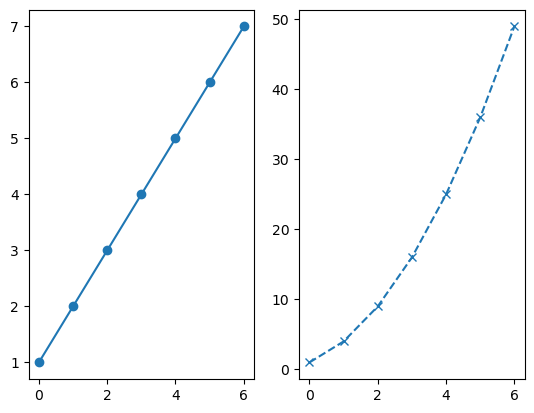

In [7]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(x,'-o')
plt.subplot(1,2,2)
plt.plot(y,'--x')

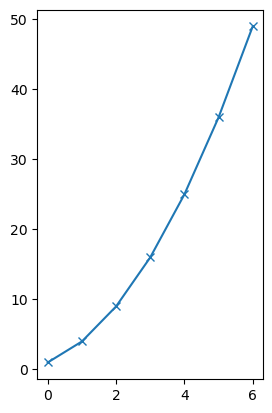

In [8]:
plt.subplot(1,2,1)
plt.plot(y,'x-')

La cellule suivante illustre le mécanisme permettant de partager le même axe $y$ sur les deux graphiques.

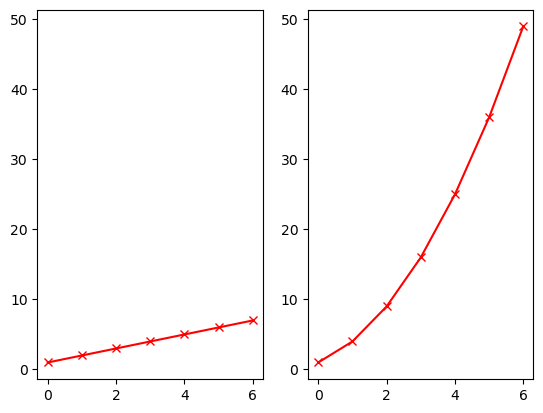

In [9]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(x,'r-x')
ax2 = plt.subplot(1,2,2,sharey=ax1)
plt.plot(y,'r-x')

Les arguments de `plt.subplot` peuvent également être spécifié par un entier à 3 chiffres dont le premier indique le nombre de lignes, le second indique le nombre de colonne et le troisème indique l'index (commençant à 1) du graphique auquel on s'adresse.

Il est également possible de créer directement une matrice de graphique tel qu'indiqué dans la cellule suivante.

In [10]:
ax1.axis([0,10,0,100])

(0.0, 10.0, 0.0, 100.0)

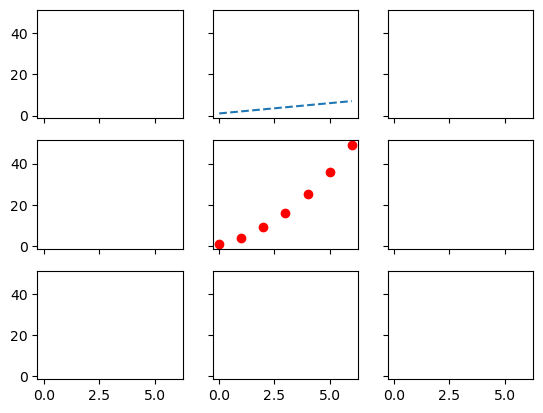

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,sharex = True, sharey = True)
ax5.plot(y, 'ro')
ax2.plot(x,'--')

## Histogrammes

Un histogramme est un cas particulier de graphique en barre où la hauteur des barres est déterminée par le nombre d'éléments d'un jeu de données correspondant à la catégorie ou plage de valeurs associée à la barre.

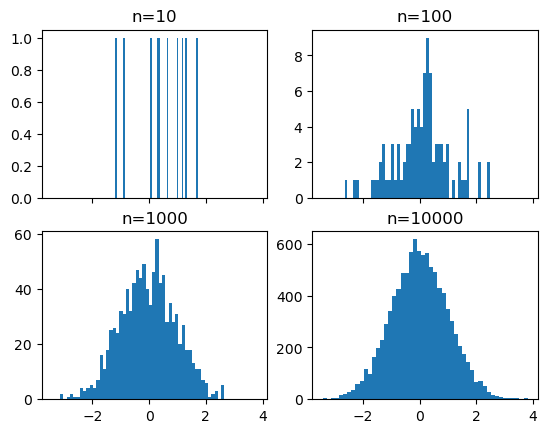

In [12]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True)
axes = [ax1,ax2,ax3,ax4]

for n in range(len(axes)) :
    sample_size = 10**(n+1)
    sample = np.random.randn(sample_size)
    #axes[n].hist(sample)
    axes[n].hist(sample,bins=50)
    axes[n].set_title('n={}'.format(sample_size))

## GridSpec

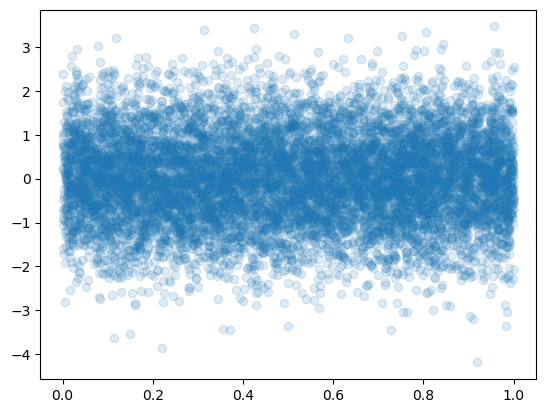

In [13]:
plt.figure()
X = np.random.rand(10000)
Y = np.random.randn(10000)
#plt.scatter(X,Y)
plt.scatter(X,Y,alpha=0.15)

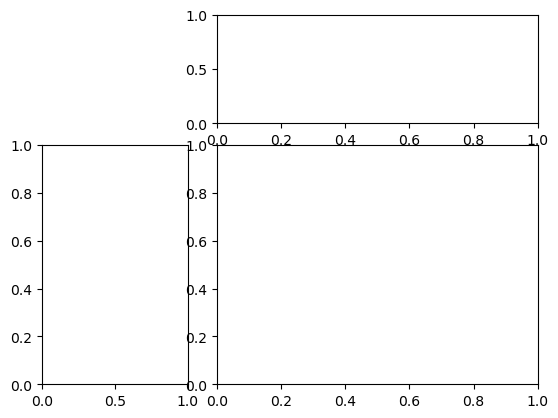

In [14]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)
top_hist = plt.subplot(gspec[0,1:])
left_hist = plt.subplot(gspec[1:,0])
scatter = plt.subplot(gspec[1:,1:])

In [15]:
scatter.scatter(X,Y)
top_hist.hist(X,bins=100,density=False)
left_hist.hist(Y,bins=100,orientation='horizontal')
left_hist.invert_xaxis()

In [16]:
for ax in [top_hist,scatter]:
    ax.set_xlim(0,1)
for ax in [left_hist,scatter]:
    ax.set_ylim(-5,5)

## Boîtes à moustache

In [17]:
normal = np.random.randn(10000)
uniform = np.random.rand(10000)
gamma = np.random.gamma(2,size=10000)

df = pd.DataFrame({'normal':normal, 'uniform': uniform, 'gamma':gamma})
df.describe()

,normal,uniform,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.005413,0.500405,1.993041
std,0.997376,0.291263,1.413004
min,-4.004219,0.000071,0.022281
25%,-0.687194,0.246613,0.957013
50%,-0.018412,0.501370,1.669394
75%,0.677159,0.753591,2.692643
max,3.645480,0.999754,11.747218


ValueError: whis must be a float or list of percentiles

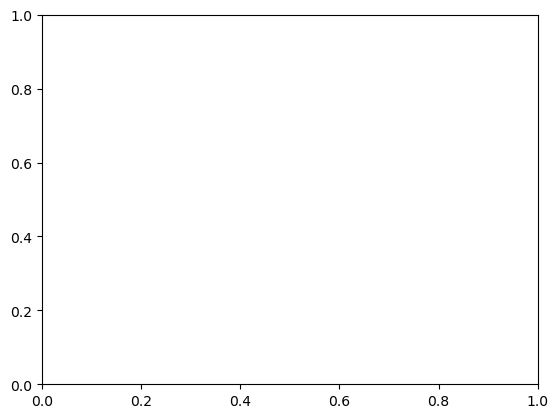

In [19]:
plt.figure()
#plt.boxplot(df['normal'])
plt.boxplot(df['normal'],whis='range')

In [ ]:
plt.figure()
plt.boxplot([df['normal'], df['uniform'], df['gamma']],whis='range')

In [ ]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()

plt.boxplot([df['normal'], df['uniform'], df['gamma']],whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'],bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()

## Cartes de chaleur

Les cartes de chaleur permettent de visualiser une grandeur fonction de deux autres variables. Il peut par exemple s'agir d'un histogramme à deux dimensions.

In [ ]:
plt.figure()
plt.hist2d(X,Y,bins=50)


Lorsqu'il s'agit de visualiser une quantité qui n'est pas un effectif, on peut utiliser la fonction de visualisation d'image `pyplot.imshow`

In [ ]:
plt.colorbar()

In [ ]:
plt.figure()
data = np.array(np.random.randn(64)).reshape((8,8))
plt.imshow(data)
plt.colorbar()